Training Data Info:
<class 'pandas.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  str    
 1   Name                         30000 non-null  str    
 2   Gender                       29947 non-null  str    
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  str    
 6   Profession                   30000 non-null  str    
 7   Type of Employment           22730 non-null  str    
 8   Location                     30000 non-null  str    
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  str    
 12  Expense Type 2               30000 non-null  str    
 13  Depende

C:\Users\mehan\AppData\Local\Temp\ipykernel_25872\1644983621.py:70: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = X.select_dtypes(include=['object']).columns


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved: target_distribution


Saved: correlation_heatmap
--- Linear Regression ---
MAE: 21588.53
RMSE: 31925.14
R2 Score: 0.5510
Time: 0.0857s
--- Ridge ---
MAE: 21582.76
RMSE: 31922.66
R2 Score: 0.5510
Time: 0.0292s


C:\Users\mehan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.478e+12, tolerance: 5.550e+09
  model = cd_fast.enet_coordinate_descent(


--- Lasso ---
MAE: 21574.20
RMSE: 31919.43
R2 Score: 0.5511
Time: 9.4613s
--- Elastic Net ---
MAE: 23038.22
RMSE: 32656.47
R2 Score: 0.5302
Time: 0.1760s


Best Ridge: {'alpha': 100} Score: 0.5847708967980514


Best Lasso: {'alpha': 10} Score: 0.5840106459425833


Best ElasticNet: {'alpha': 0.1, 'l1_ratio': 0.8} Score: 0.5872102663374708
--- Ridge Tuned ---
MAE: 21582.04
RMSE: 31897.55
R2 Score: 0.5517
Time: 0.0215s


--- Lasso Tuned ---
MAE: 21564.42
RMSE: 31905.16
R2 Score: 0.5515
Time: 1.0398s


--- ElasticNet Tuned ---
MAE: 21642.32
RMSE: 31882.63
R2 Score: 0.5522
Time: 1.9514s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved: predicted_vs_actual


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved: residual_plot


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved: coefficients_comparison

Top Coefficients:
                                        Linear         Ridge         Lasso  \
Loan Amount Request (USD)         35357.491163  33817.779499  35161.969919   
Income (USD)                      34525.040585    727.913653     51.141880   
Property Age                     -34464.710463   -671.410532      0.000000   
Profession_Student               -12974.689299   -123.323516      0.000000   
Profession_Businessman            12532.982764    129.432831      0.000000   
Credit Score                      11645.435916  11630.499591  11657.066495   
Profession_Pensioner               6626.968567   3034.539078   4491.639502   
Type of Employment_Realty agents   6353.602932   2422.819029   2494.205608   
Income Stability_High             -4819.179272  -2798.027900  -6322.853554   
Type of Employment_IT staff       -5647.484904  -2099.042979  -1677.673846   

                                    ElasticNet  
Loan Amount Request (USD)         29622.78

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved: learning_curve_Linear_Regression


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved: learning_curve_Ridge_Regression


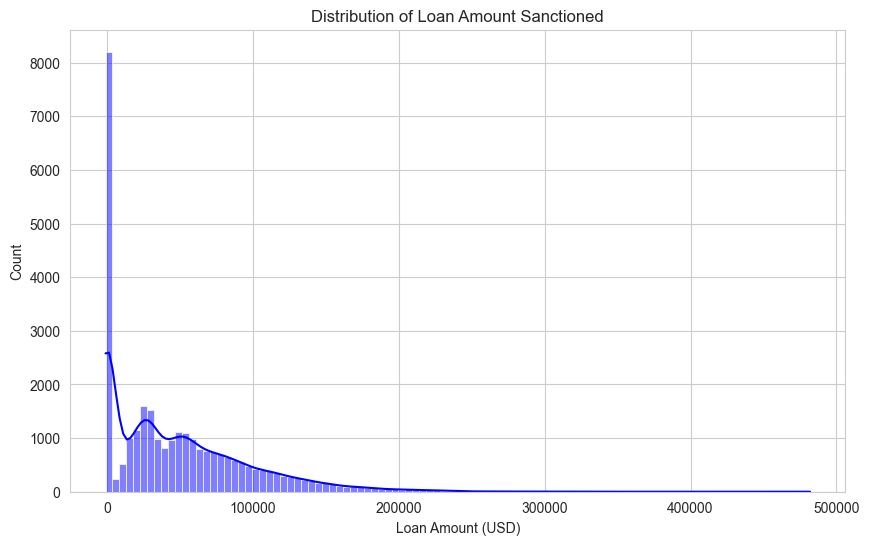

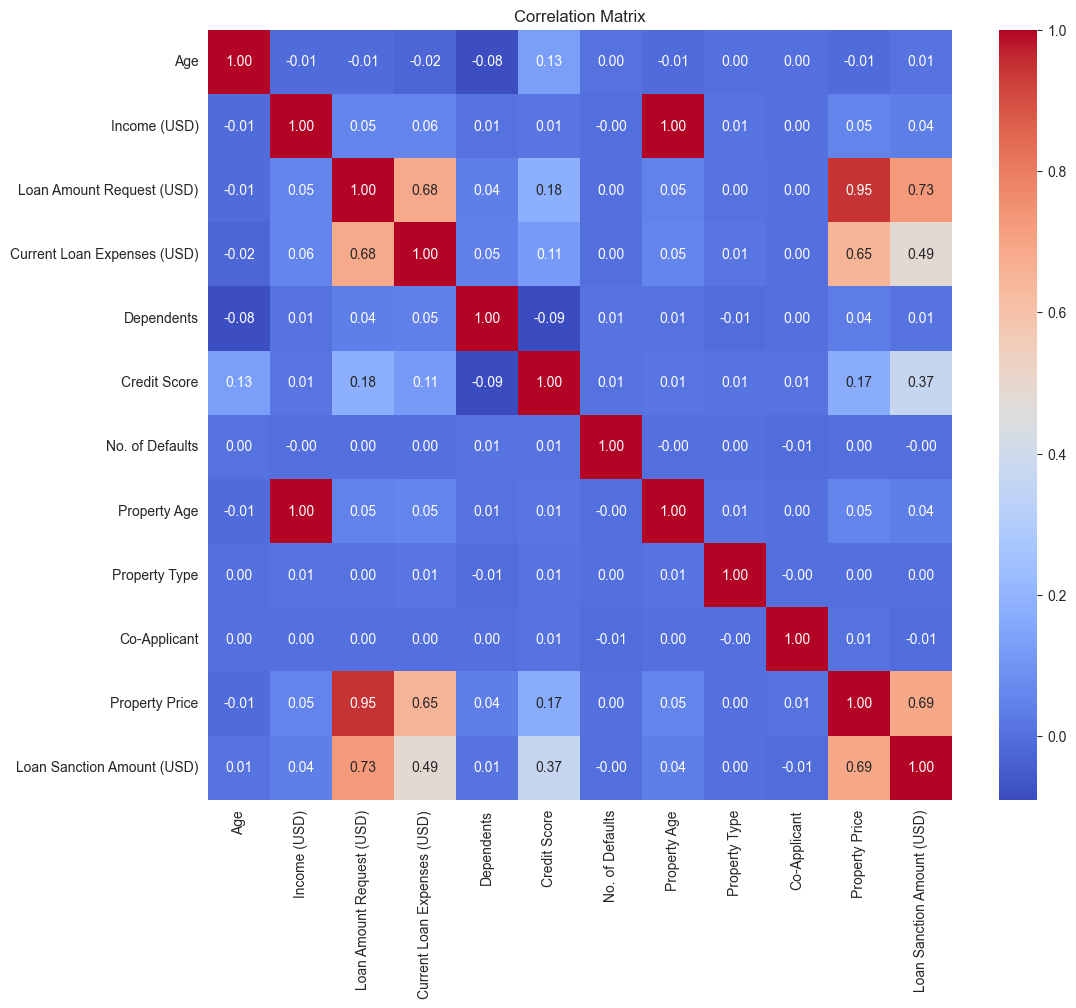

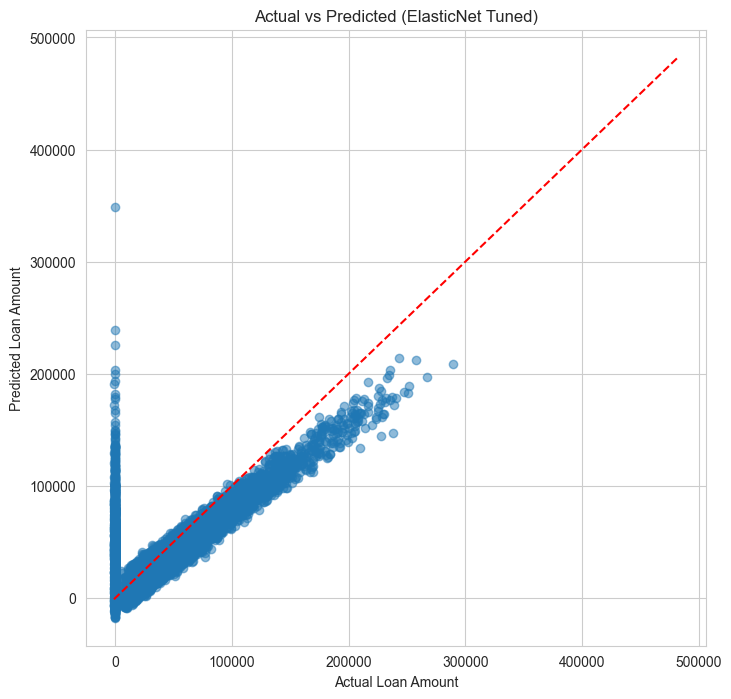

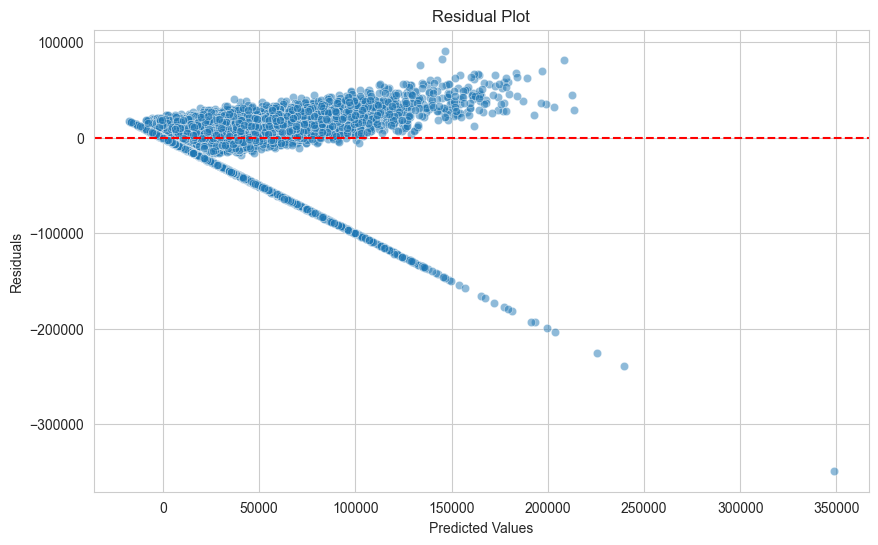

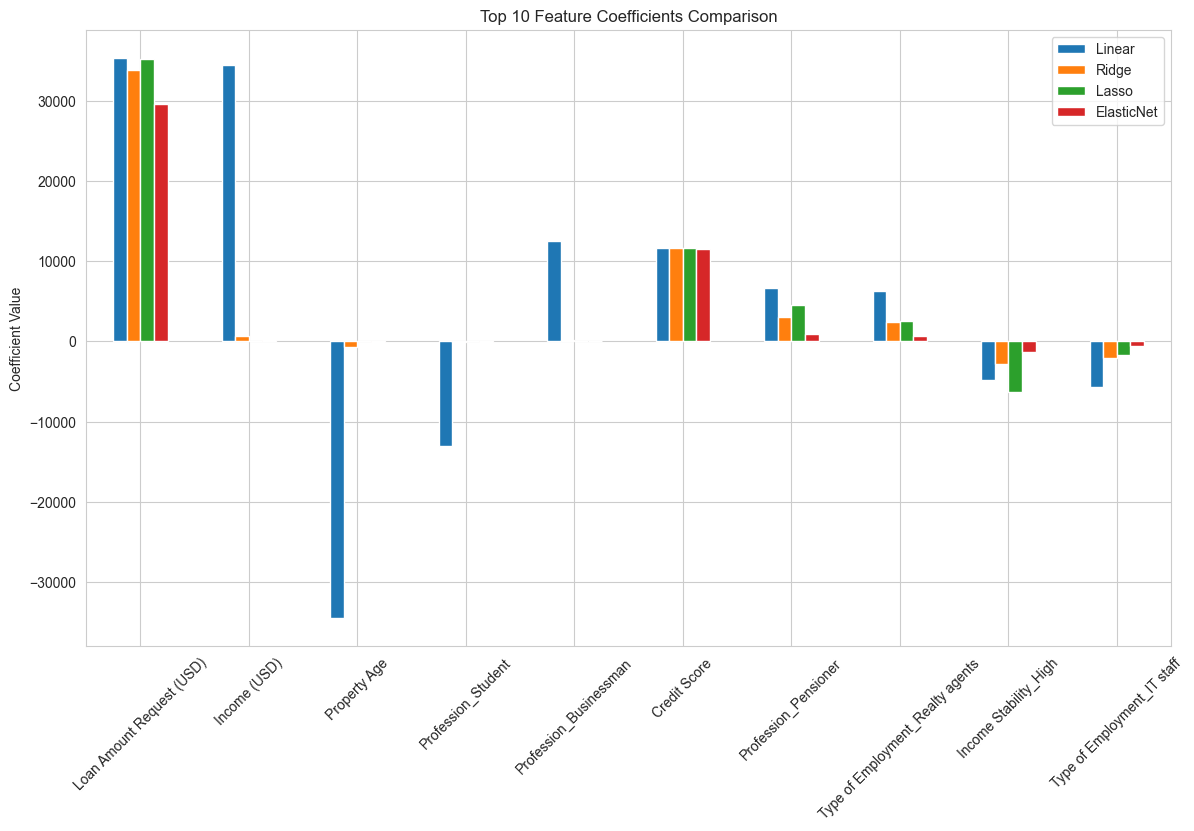

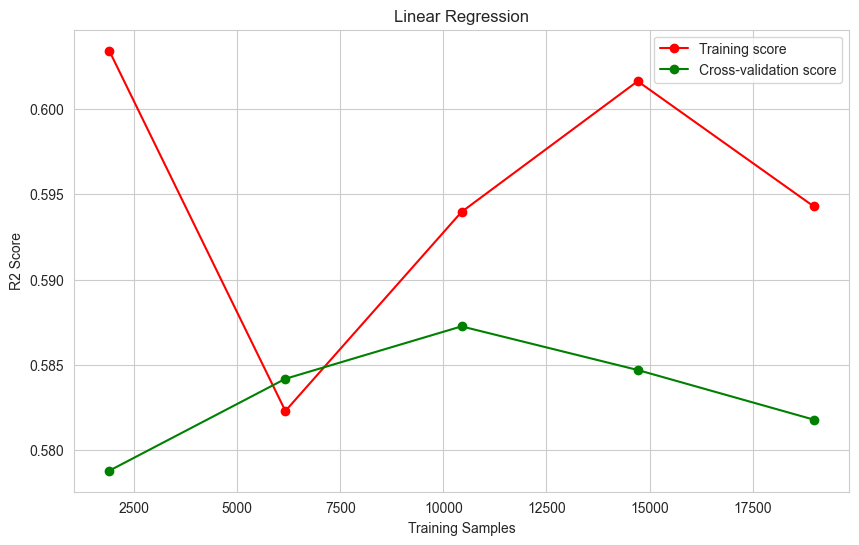

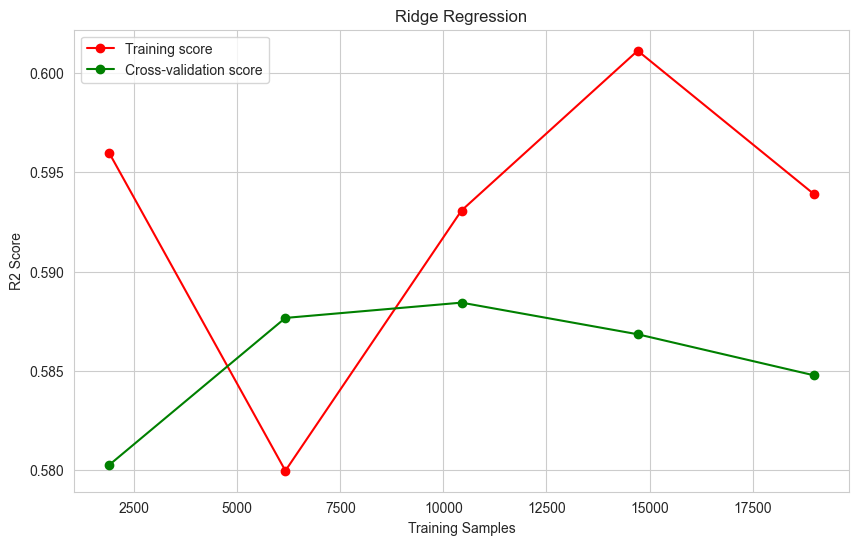

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, LearningCurveDisplay, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Setup plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['savefig.dpi'] = 600

# Ensure plot directories exist
os.makedirs('../plots/png', exist_ok=True)
os.makedirs('../plots/eps', exist_ok=True)

def log_result(text):
    print(text)
    with open('results.txt', 'a') as f:
        f.write(text + '\n')

def save_plot(filename):
    plt.savefig(f'../plots/png/{filename}.png', bbox_inches='tight')
    plt.savefig(f'../plots/eps/{filename}.eps', bbox_inches='tight', format='eps')
    log_result(f'Saved: {filename}')

train_path = '../dataset/Predict Loan Amount Data/train.csv'
test_path = '../dataset/Predict Loan Amount Data/test.csv'

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

print("Training Data Info:")
df_train.info()
print("\nMissing Values:")
print(df_train.isnull().sum())

target_col = 'Loan Sanction Amount (USD)'
print("\nTarget Distribution:")
print(df_train[target_col].describe())

def preprocess_data(df, is_train=True):
    df = df.copy()
    
    # Drop ID columns
    cols_to_drop = ['Customer ID', 'Name', 'Property ID']
    df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)
    
    # Separate features and target
    if is_train:
        # Drop rows where target is missing (if any)
        df = df.dropna(subset=[target_col])
        y = df[target_col]
        X = df.drop(columns=[target_col])
    else:
        X = df
        y = None
        
    # Define categorical and numerical columns
    # We need to manually identify them or infer
    num_cols = X.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = X.select_dtypes(include=['object']).columns
    
    return X, y, num_cols, cat_cols

X, y, num_cols, cat_cols = preprocess_data(df_train, is_train=True)
print(f"Numerical Columns: {list(num_cols)}")
print(f"Categorical Columns: {list(cat_cols)}")

# Define Preprocessing Pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit preprocessor on training data
print("fitting preprocessor...")
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
print("Preprocessor fit.")

# Get feature names for later use
onehot_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols)
feature_names = list(num_cols) + list(onehot_features)

print("Processed Feature Shape:", X_train_processed.shape)

# Target Distribution
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, color='blue')
plt.title('Distribution of Loan Amount Sanctioned')
plt.xlabel('Loan Amount (USD)')
save_plot('target_distribution')

# Correlation Heatmap (Numerical)
plt.figure(figsize=(12, 10))
corr_matrix = df_train[num_cols].join(y).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
save_plot('correlation_heatmap')

results = {}
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet()
}

def evaluate_model(name, model, X_train, y_train, X_val, y_val):
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    y_pred = model.predict(X_val)
    
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    
    log_result(f"--- {name} ---")
    log_result(f"MAE: {mae:.2f}")
    log_result(f"RMSE: {rmse:.2f}")
    log_result(f"R2 Score: {r2:.4f}")
    log_result(f"Time: {train_time:.4f}s")
    
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'Time': train_time,
        'Model': model
    }

for name, model in models.items():
    results[name] = evaluate_model(name, model, X_train_processed, y_train, X_val_processed, y_val)

# Ridge Tuning
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2', n_jobs=-1)
ridge_grid.fit(X_train_processed, y_train)
log_result(f"Best Ridge: {ridge_grid.best_params_} Score: {ridge_grid.best_score_}")

# Lasso Tuning
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(Lasso(max_iter=5000), lasso_params, cv=5, scoring='r2', n_jobs=-1)
lasso_grid.fit(X_train_processed, y_train)
log_result(f"Best Lasso: {lasso_grid.best_params_} Score: {lasso_grid.best_score_}")

# ElasticNet Tuning
enet_params = {'alpha': [0.01, 0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8]}
enet_grid = GridSearchCV(ElasticNet(max_iter=5000), enet_params, cv=5, scoring='r2', n_jobs=-1)
enet_grid.fit(X_train_processed, y_train)
log_result(f"Best ElasticNet: {enet_grid.best_params_} Score: {enet_grid.best_score_}")

# Update results with tuned models
tuned_models = {
    'Ridge Tuned': ridge_grid.best_estimator_,
    'Lasso Tuned': lasso_grid.best_estimator_,
    'ElasticNet Tuned': enet_grid.best_estimator_
}

for name, model in tuned_models.items():
    results[name] = evaluate_model(name, model, X_train_processed, y_train, X_val_processed, y_val)

# Predicted vs Actual (Best Model)
best_model_name = max(results, key=lambda k: results[k]['R2'])
best_model = results[best_model_name]['Model']
y_pred = best_model.predict(X_val_processed)

plt.figure(figsize=(8, 8))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Loan Amount')
plt.ylabel('Predicted Loan Amount')
plt.title(f'Actual vs Predicted ({best_model_name})')
save_plot('predicted_vs_actual')

# Residual Plot
residuals = y_val - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
save_plot('residual_plot')

# Coefficients Comparison
coef_data = []

if hasattr(models['Linear Regression'], 'coef_'):
    coef_data.append(pd.Series(models['Linear Regression'].coef_, index=feature_names, name='Linear'))
if hasattr(results.get('Ridge Tuned', {}).get('Model'), 'coef_'):
    coef_data.append(pd.Series(results['Ridge Tuned']['Model'].coef_, index=feature_names, name='Ridge'))
if hasattr(results.get('Lasso Tuned', {}).get('Model'), 'coef_'):
    coef_data.append(pd.Series(results['Lasso Tuned']['Model'].coef_, index=feature_names, name='Lasso'))
if hasattr(results.get('ElasticNet Tuned', {}).get('Model'), 'coef_'):
    coef_data.append(pd.Series(results['ElasticNet Tuned']['Model'].coef_, index=feature_names, name='ElasticNet'))

if coef_data:
    coef_df = pd.concat(coef_data, axis=1)
    # Filter top coefficients for better visualization
    top_features = coef_df.abs().max(axis=1).sort_values(ascending=False).head(10).index
    
    coef_df.loc[top_features].plot(kind='bar', figsize=(14, 8))
    plt.title('Top 10 Feature Coefficients Comparison')
    plt.ylabel('Coefficient Value')
    plt.xticks(rotation=45)
    save_plot('coefficients_comparison')
    
    # Save coefficients value to results.txt
    log_result("\nTop Coefficients:")
    log_result(str(coef_df.loc[top_features]))

# Learning Curves (Bias-Variance)
def plot_learning_curve(estimator, title, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, 
        n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5), scoring='r2'
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.figure()
    plt.title(title)
    plt.xlabel('Training Samples')
    plt.ylabel('R2 Score')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.legend(loc='best')
    save_plot(f'learning_curve_{title.replace(" ", "_")}')

plot_learning_curve(models['Linear Regression'], 'Linear Regression', X_train_processed, y_train)
plot_learning_curve(tuned_models['Ridge Tuned'], 'Ridge Regression', X_train_processed, y_train)
